<a href="https://colab.research.google.com/github/dbarrau/TensorFlow_training/blob/main/01_neural_networks_with_tensorlfow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,normalize
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load file
df = pd.read_csv("/content/kc_house_data.csv")

# drop unwanted columns
df = df.drop(["id","date","lat","long","yr_built","yr_renovated","zipcode"], axis=1)

# Sum all sqft into one variable, drop the unneeded
#df = df.drop(["sqft_living","sqft_lot","sqft_above","sqft_living15","sqft_lot15"], axis=1)

# Basement data was added to total, now we prepare basement data to binary (has or has not basement)
df["sqft_basement"] = df["sqft_basement"].apply(lambda x: 1 if x != 0 else x)
df = df.rename(columns={"sqft_basement":"basement"})

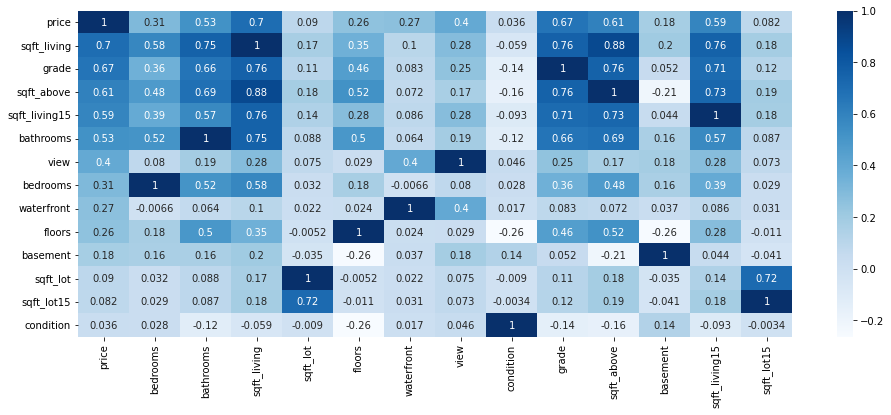

In [ ]:
df_corr = pd.DataFrame(df.corr())
df_corr = df_corr.sort_values(by="price", ascending=False)

plt.figure(figsize=(16,6));
sns.heatmap(df_corr, cmap="Blues", annot=True);

In [ ]:
df = df.drop(["condition","sqft_lot15","sqft_lot","basement","waterfront","bedrooms","view","sqft_living15"], axis=1)


In [ ]:

# Create train and test set
X = df.drop("price",axis=1)

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

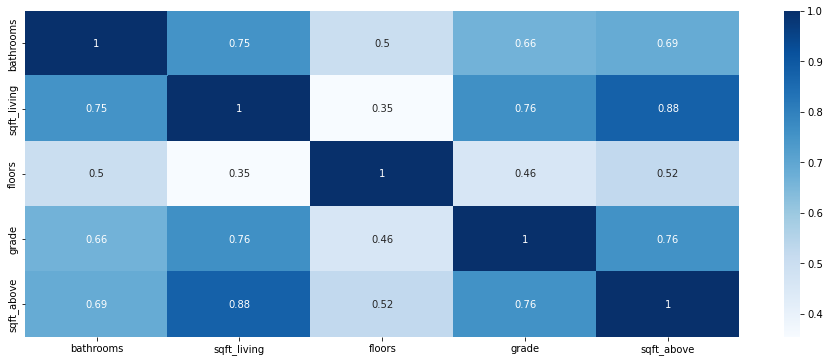

In [ ]:

corr = X.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr, cmap="Blues", annot=True);

In [ ]:
# Create column trasnformer 
ct = make_column_transformer(
  (MinMaxScaler(), ["bathrooms","sqft_living","floors","grade","sqft_above"]),
)

# fit column transformer
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['bathrooms', 'sqft_living', 'floors', 'grade',
                                  'sqft_above'])])

In [ ]:


# Normalize data with fit ct
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal = tf.cast(X_train_normal, dtype=tf.float64)
y_train = tf.cast(y_train, dtype=tf.float64)
y_train,X_train_normal
X_train.shape[1]

5

# New section

In [ ]:
# Set up random seed
tf.random.set_seed(42)

# 1. create model
housing = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu", input_shape=(X_train.shape[1],)),
  #tf.keras.layers.Dense(1)
])

# 2. Compile model
housing.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
housing.build()
housing.summary()
history = housing.fit(X_train_normal,y_train, batch_size=100, epochs=100, validation_split=0.2)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
139/139 [==============================] - 142s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: nan - mae: nan - val_loss:

In [ ]:

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["bathrooms","sqft_living","sqft_lot","condition","grade","sqft_above"]),
    (OneHotEncoder(handle_unknown="ignore"), ["bedrooms", "floors", "waterfront","view"]) # turn column values to values between 0 and 1
)

# Create X and y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit and transform column transformer to our training data
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

NameError: ignored